In [4]:
# Importar la librería principal para manejar datos
import pandas as pd

# Definir la ruta al archivo CSV
file_path = 'data/train.csv'

# Cargar el archivo en un DataFrame de pandas
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
display(df.head())

# Obtener un resumen de las columnas, tipos de datos y valores nulos
print("\nInformación general del DataFrame:")
df.info()

Primeras 5 filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1

Estadísticas de 'SalePrice':
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


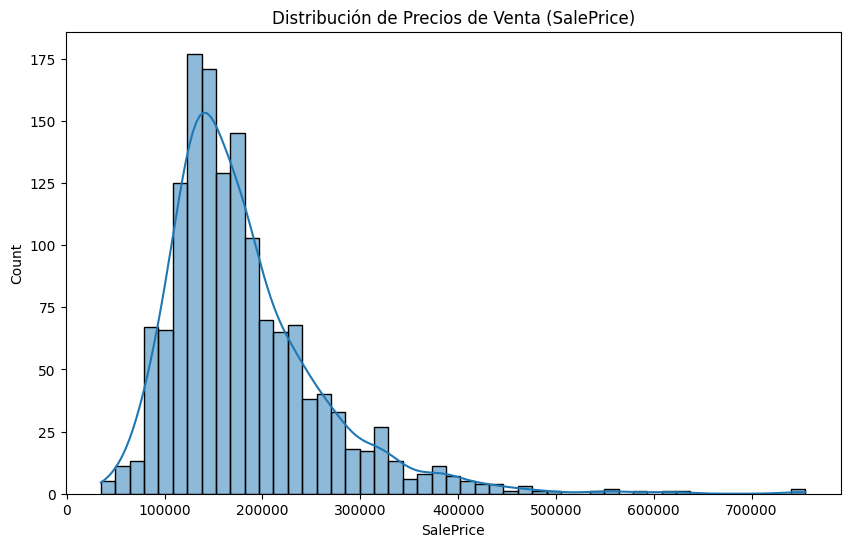


Porcentaje de valores nulos por columna:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Condition2       0.000000
dtype: float64


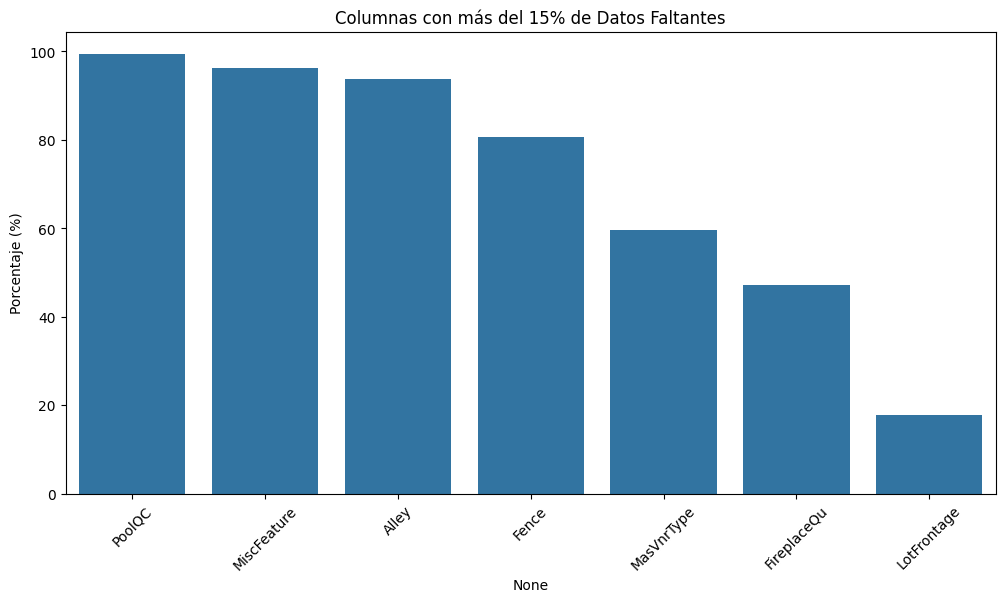

In [5]:
# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis de la variable objetivo: SalePrice ---

# Describir estadísticamente la columna 'SalePrice'
print("Estadísticas de 'SalePrice':")
print(df['SalePrice'].describe())

# Visualizar la distribución de SalePrice con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de Precios de Venta (SalePrice)')
plt.show()


# --- Análisis de valores nulos ---

# Calcular el porcentaje de valores nulos y mostrar los más altos
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100
print("\nPorcentaje de valores nulos por columna:")
print(missing_percentage.head(20)) # Mostramos las 20 columnas con más nulos

# Visualizar las columnas con más del 15% de valores nulos
plt.figure(figsize=(12, 6))
high_missing_percentage = missing_percentage[missing_percentage > 15]
sns.barplot(x=high_missing_percentage.index, y=high_missing_percentage)
plt.title('Columnas con más del 15% de Datos Faltantes')
plt.xticks(rotation=45)
plt.ylabel('Porcentaje (%)')
plt.show()

In [6]:
# --- 3.1: Eliminar columnas con alto porcentaje de nulos ---

# Establecemos un umbral (ej. 50%)
# Si una columna tiene más del 50% de datos nulos, la eliminamos
df_cleaned = df.drop(columns=missing_percentage[missing_percentage > 50].index)

print("Columnas eliminadas por tener >50% de nulos:")
print(list(missing_percentage[missing_percentage > 50].index))


# --- 3.2: Rellenar (imputar) los valores nulos restantes ---

# Separamos las columnas por tipo: numéricas y categóricas (texto)
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Estrategia para rellenar datos numéricos: usaremos la mediana
for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Estrategia para rellenar datos categóricos: usaremos la moda (el valor más frecuente)
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


# --- 3.3: Verificación final ---

# Comprobar que no queden valores nulos en nuestro nuevo DataFrame
print("\n¿Quedan valores nulos después de la limpieza?")
print(df_cleaned.isnull().sum().any()) # Debería devolver 'False'

Columnas eliminadas por tener >50% de nulos:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType']

¿Quedan valores nulos después de la limpieza?
False


In [7]:
# --- 4.1: Aplicar One-Hot Encoding ---

# Usamos pd.get_dummies() en nuestro dataframe limpio.
# drop_first=True es para evitar redundancia en los datos, es una buena práctica.
df_final = pd.get_dummies(df_cleaned, drop_first=True)

# --- 4.2: Ver el resultado ---

print("Forma del DataFrame original limpio:", df_cleaned.shape)
print("Forma del DataFrame final (numérico):", df_final.shape)

print("\nPrimeras filas del DataFrame final:")
display(df_final.head())

Forma del DataFrame original limpio: (1460, 76)
Forma del DataFrame final (numérico): (1460, 235)

Primeras filas del DataFrame final:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [8]:
# Importar la función para dividir los datos
from sklearn.model_selection import train_test_split

# --- 5.1: Separar en X e y ---

# 'y' es nuestra variable objetivo, la que queremos predecir
y = df_final['SalePrice']

# 'X' son todas las demás columnas, nuestras variables predictoras
X = df_final.drop('SalePrice', axis=1)


# --- 5.2: Dividir en conjuntos de entrenamiento y prueba ---

# Dividimos los datos: 80% para entrenar, 20% para probar.
# random_state=42 asegura que la división sea siempre la misma, para que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 5.3: Verificar las dimensiones ---

print("Dimensiones de X_train (entrenamiento):", X_train.shape)
print("Dimensiones de X_test (prueba):", X_test.shape)
print("Dimensiones de y_train (entrenamiento):", y_train.shape)
print("Dimensiones de y_test (prueba):", y_test.shape)

Dimensiones de X_train (entrenamiento): (1168, 234)
Dimensiones de X_test (prueba): (292, 234)
Dimensiones de y_train (entrenamiento): (1168,)
Dimensiones de y_test (prueba): (292,)


Entrenando el modelo... (puede tardar unos segundos)
¡Entrenamiento completado!

Error Cuadrático Medio (MSE): 861132414.50
Raíz del Error Cuadrático Medio (RMSE): $29345.06


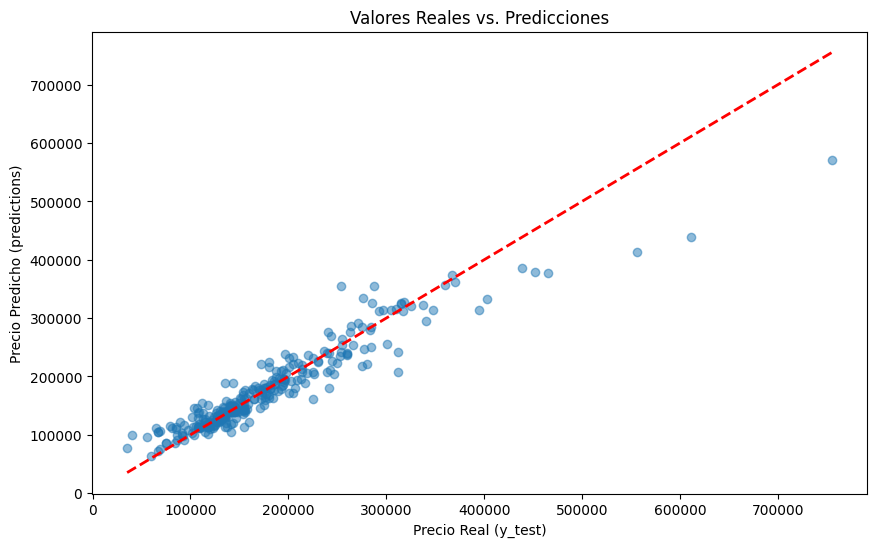

In [9]:
# Importar el modelo y las métricas de error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# --- 6.1: Crear y entrenar el modelo ---

# Inicializamos el modelo. n_estimators es el número de "árboles" que usará.
# random_state=42 es para la reproducibilidad.
model = RandomForestRegressor(n_estimators=100, random_state=42)

print("Entrenando el modelo... (puede tardar unos segundos)")
# Entrenamos el modelo con nuestros datos de entrenamiento
model.fit(X_train, y_train)
print("¡Entrenamiento completado!")


# --- 6.2: Hacer predicciones con los datos de prueba ---

# El modelo ahora predice los precios para el conjunto de prueba (que nunca ha visto)
predictions = model.predict(X_test)


# --- 6.3: Evaluar el rendimiento del modelo ---

# Calculamos el error. Usamos el Error Cuadrático Medio (MSE).
mse = mean_squared_error(y_test, predictions)
# Calculamos la Raíz del Error Cuadrático Medio (RMSE) para que sea más interpretable.
rmse = np.sqrt(mse)

print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse:.2f}")


# --- 6.4: Visualizar los resultados ---

# Un gráfico de dispersión para comparar los valores reales con las predicciones.
# Si el modelo fuera perfecto, todos los puntos estarían en la línea diagonal.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Precio Real (y_test)')
plt.ylabel('Precio Predicho (predictions)')
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# --- 7.1: Definir la parrilla de hiperparámetros a probar ---

# Número de árboles en el bosque
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Número de características a considerar en cada división
max_features = [1.0, 'sqrt']
# Profundidad máxima del árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada hoja
min_samples_leaf = [1, 2, 4]

# Crear la parrilla aleatoria
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# --- 7.2: Crear y configurar la búsqueda aleatoria ---

# Creamos el modelo base para tunear
rf = RandomForestRegressor()

# Configuramos la búsqueda: 100 combinaciones diferentes, usando 3-fold cross-validation.
# n_jobs = -1 usa todos los procesadores disponibles para acelerar.
# verbose=2 te mostrará el progreso.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# --- 7.3: Ejecutar la búsqueda ---
# ¡ADVERTENCIA: Este paso puede tardar varios minutos!

print("Iniciando el ajuste de hiperparámetros...")
rf_random.fit(X_train, y_train)
print("¡Ajuste completado!")


# --- 7.4: Mostrar los mejores parámetros encontrados ---
print("\nMejores parámetros encontrados:")
print(rf_random.best_params_)

Iniciando el ajuste de hiperparámetros...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
¡Ajuste completado!

Mejores parámetros encontrados:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': None}


--- Comparación de Resultados ---
RMSE del modelo original: $29345.06
RMSE del nuevo modelo optimizado: $29176.70


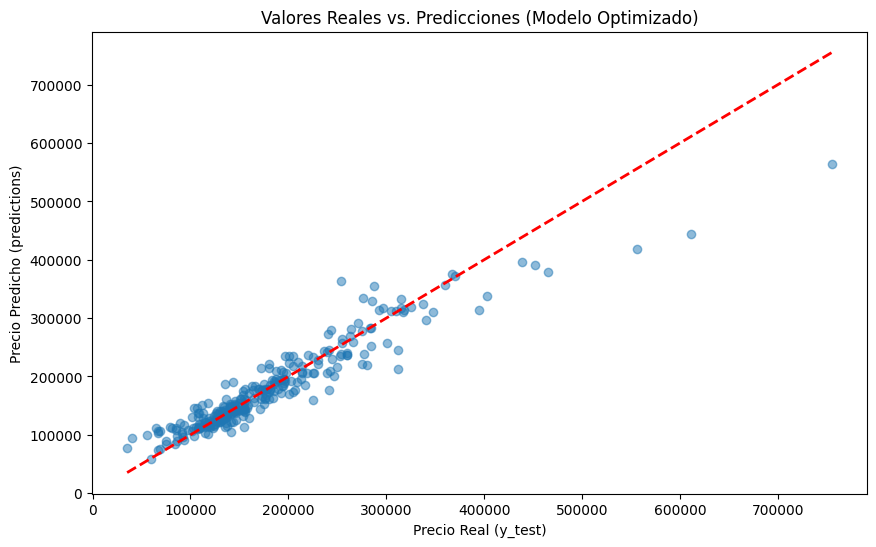

In [11]:
# --- 7.5: Usar el mejor modelo para predecir y evaluar ---

# El mejor modelo ya está entrenado, lo obtenemos de la búsqueda
best_model = rf_random.best_estimator_

# Hacemos las nuevas predicciones
new_predictions = best_model.predict(X_test)

# Calculamos el nuevo error
new_mse = mean_squared_error(y_test, new_predictions)
new_rmse = np.sqrt(new_mse)

print("--- Comparación de Resultados ---")
print(f"RMSE del modelo original: ${rmse:.2f}")
print(f"RMSE del nuevo modelo optimizado: ${new_rmse:.2f}")

# Visualizar los nuevos resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reales vs. Predicciones (Modelo Optimizado)')
plt.xlabel('Precio Real (y_test)')
plt.ylabel('Precio Predicho (predictions)')
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# --- 1. Generar predicciones para ambos modelos ---
base_predictions = model.predict(X_test)
optimized_predictions = best_model.predict(X_test)

# --- 2. Calcular métricas para el Modelo Base ---
base_mae = mean_absolute_error(y_test, base_predictions)
base_rmse = np.sqrt(mean_squared_error(y_test, base_predictions))
base_r2 = r2_score(y_test, base_predictions)

# --- 3. Calcular métricas para el Modelo Optimizado ---
opt_mae = mean_absolute_error(y_test, optimized_predictions)
opt_rmse = np.sqrt(mean_squared_error(y_test, optimized_predictions))
opt_r2 = r2_score(y_test, optimized_predictions)

# --- 4. Crear un DataFrame de pandas para una comparación clara ---
comparison_data = {
    "Métrica": ["Error Absoluto Medio (MAE)", "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Modelo Base": [f"${base_mae:,.2f}", f"${base_rmse:,.2f}", f"{base_r2:.2%}"],
    "Modelo Optimizado": [f"${opt_mae:,.2f}", f"${opt_rmse:,.2f}", f"{opt_r2:.2%}"]
}

comparison_df = pd.DataFrame(comparison_data)

# --- 5. Imprimir la tabla de comparación ---
print("--- Tabla Comparativa de Rendimiento de Modelos ---")
display(comparison_df.set_index('Métrica'))

--- Tabla Comparativa de Rendimiento de Modelos ---


,Modelo Base,Modelo Optimizado
Métrica,,
Error Absoluto Medio (MAE),"$17,790.83","$17,781.87"
Raíz del Error Cuadrático Medio (RMSE),"$29,345.06","$29,176.70"
Coeficiente de Determinación (R²),88.77%,88.90%


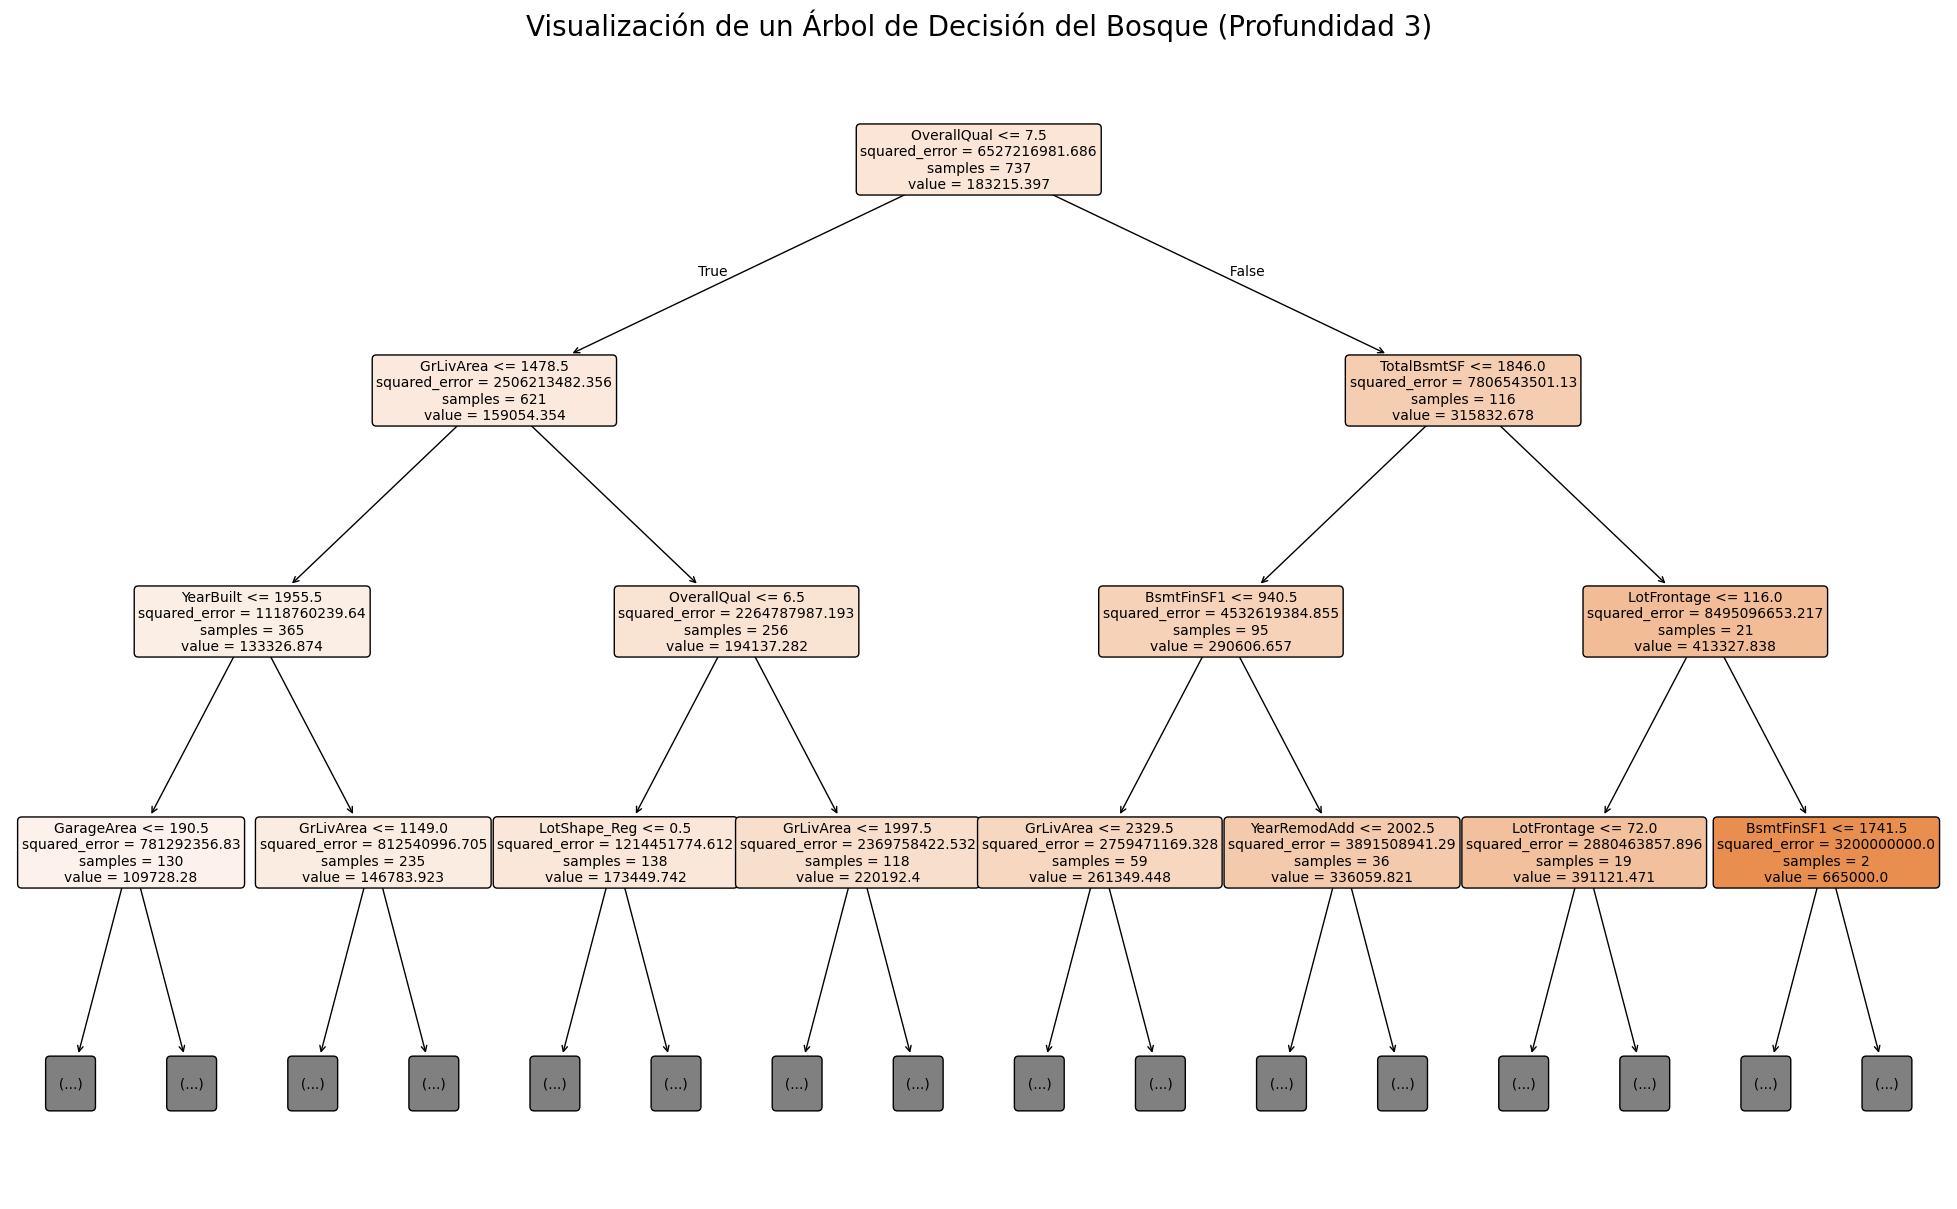

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# --- 1. Extraer y visualizar un solo árbol del modelo optimizado ---

# Seleccionamos un árbol del bosque (por ejemplo, el primero, índice 0)
single_tree = best_model.estimators_[0]

# Preparamos la figura para el gráfico
plt.figure(figsize=(25, 15))

# Dibujamos el árbol
# max_depth=3 limita la profundidad para que sea legible. ¡Quita este parámetro para ver el árbol completo!
# feature_names nos permite ver el nombre de la característica en cada nodo.
plot_tree(single_tree, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          max_depth=3,  # <-- Límite para legibilidad
          fontsize=10)

plt.title("Visualización de un Árbol de Decisión del Bosque (Profundidad 3)", fontsize=20)
plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_15952\856006558.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


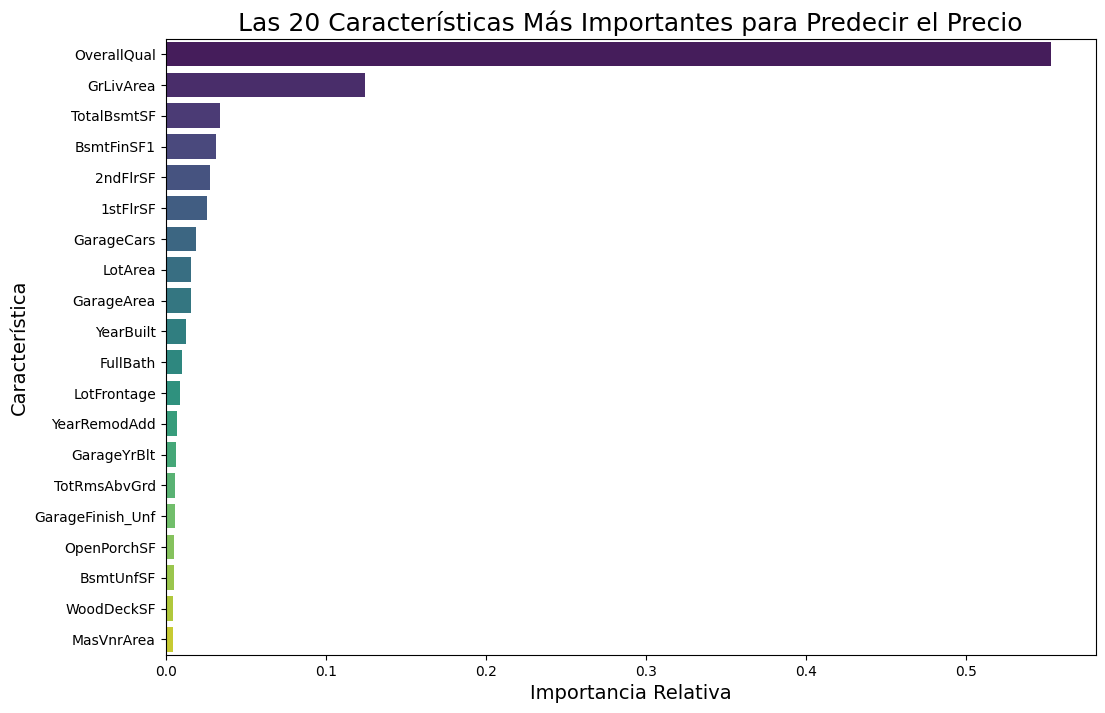

In [14]:
import pandas as pd
import seaborn as sns

# --- 2. Obtener y graficar la importancia de las características ---

# Extraemos la importancia de cada característica del modelo optimizado
importances = best_model.feature_importances_

# Creamos un DataFrame para manejar y ordenar los datos
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Ordenamos las características de la más a la menos importante
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Graficamos las 20 características más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')

plt.title('Las 20 Características Más Importantes para Predecir el Precio', fontsize=18)
plt.xlabel('Importancia Relativa', fontsize=14)
plt.ylabel('Característica', fontsize=14)
plt.show()

In [15]:
import joblib

# --- Guardar el modelo optimizado ---
# Le damos un nombre al archivo, la extensión .pkl es una convención.
filename = 'house_price_model.pkl'
joblib.dump(best_model, filename)

# --- MUY IMPORTANTE: Guardar las columnas del modelo ---
# También guardamos la lista de columnas que el modelo espera recibir.
# Esto es crucial para que el backend prepare los datos exactamente igual.
model_columns = X.columns
joblib.dump(model_columns, 'model_columns.pkl')

print(f"¡Modelo guardado exitosamente como '{filename}'!")
print(f"¡Columnas del modelo guardadas como 'model_columns.pkl'!")

¡Modelo guardado exitosamente como 'house_price_model.pkl'!
¡Columnas del modelo guardadas como 'model_columns.pkl'!


# Experimento 2: Modelo Simplificado con 10 Características

In [16]:
# --- RE-ENTRENAMIENTO CON 10 CARACTERÍSTICAS ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# 1. Seleccionar las 10 características más importantes + el precio de venta
top_10_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 
    'GarageArea', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 
    'FullBath', 'TotRmsAbvGrd'
]
target_variable = 'SalePrice'

df_simple = df[top_10_features + [target_variable]].copy()

# 2. Limpieza simple (rellenar nulos si los hubiera en estas columnas)
for col in df_simple.columns:
    if df_simple[col].isnull().any():
        df_simple[col] = df_simple[col].fillna(df_simple[col].median())

# 3. Separar en X (características) e y (objetivo)
X_simple = df_simple[top_10_features]
y_simple = df_simple[target_variable]

# 4. Dividir en conjuntos de entrenamiento y prueba
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# 5. Entrenar el nuevo modelo simplificado
simple_model = RandomForestRegressor(n_estimators=100, random_state=42)
print("Entrenando el modelo simplificado...")
simple_model.fit(X_train_s, y_train_s)
print("Entrenamiento completado.")

# 6. Evaluar el nuevo modelo
predictions_s = simple_model.predict(X_test_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, predictions_s))
r2_s = r2_score(y_test_s, predictions_s)

print("\n--- Rendimiento del Modelo Simplificado (10 Features) ---")
print(f"RMSE: ${rmse_s:,.2f}")
print(f"R²: {r2_s:.2%}")

# 7. GUARDAR el nuevo modelo y sus columnas
joblib.dump(simple_model, 'simple_model.pkl')
joblib.dump(top_10_features, 'simple_model_columns.pkl')
print("\n¡Modelo simplificado y columnas guardados exitosamente!")

Entrenando el modelo simplificado...
Entrenamiento completado.

--- Rendimiento del Modelo Simplificado (10 Features) ---
RMSE: $29,657.71
R²: 88.53%

¡Modelo simplificado y columnas guardados exitosamente!


In [17]:
import pandas as pd

# --- Recolectar datos del Modelo Base ---
base_mae = mean_absolute_error(y_test, base_predictions)
base_rmse = np.sqrt(mean_squared_error(y_test, base_predictions))
base_r2 = r2_score(y_test, base_predictions)

# --- Recolectar datos del Modelo Optimizado ---
opt_mae = mean_absolute_error(y_test, optimized_predictions)
opt_rmse = np.sqrt(mean_squared_error(y_test, optimized_predictions))
opt_r2 = r2_score(y_test, optimized_predictions)

# --- Recolectar datos del Modelo Simplificado ---
# (Estos ya los calculamos en la celda anterior como rmse_s y r2_s)
simple_mae = mean_absolute_error(y_test_s, predictions_s)

# --- Crear un DataFrame para la comparación ---
final_comparison_data = {
    "Métrica": ["Error Absoluto Medio (MAE)", "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Modelo Base": [f"${base_mae:,.2f}", f"${base_rmse:,.2f}", f"{base_r2:.2%}"],
    "Modelo Optimizado": [f"${opt_mae:,.2f}", f"${opt_rmse:,.2f}", f"{opt_r2:.2%}"],
    "Modelo Simplificado (10 feat.)": [f"${simple_mae:,.2f}", f"${rmse_s:,.2f}", f"{r2_s:.2%}"]
}

final_comparison_df = pd.DataFrame(final_comparison_data)

# --- Imprimir la tabla final ---
print("--- Tabla Comparativa Final de Rendimiento de Modelos ---")
display(final_comparison_df.set_index('Métrica'))

--- Tabla Comparativa Final de Rendimiento de Modelos ---


,Modelo Base,Modelo Optimizado,Modelo Simplificado (10 feat.)
Métrica,,,
Error Absoluto Medio (MAE),"$17,790.83","$17,781.87","$19,050.00"
Raíz del Error Cuadrático Medio (RMSE),"$29,345.06","$29,176.70","$29,657.71"
Coeficiente de Determinación (R²),88.77%,88.90%,88.53%
